# EXPOSURE DATA

Goal is to explore exosure data shared provided by IDMS and located in **exposure** folder
<br>

$$severity =F(hazard\quad intensity, exposure, vulnerability) = $$
$$ exposure \times f_{imp} (hazard\quad intensity)$$
<br>

**WHAT IS EXPOSURE ?**

1. The Entity’s exposures attribute contains geolocalized values of anything exposed to the hazard, let it be monetary value of assets or number of human lifes, for example. It is of type Exposures. (see [CLIMADA python tutorial](https://climada-python.readthedocs.io/en/stable/tutorial/1_main_climada.html))
2. Exposure can describe the geographical distribution of people, livelihoods and assets or infrastructure; all items potentially exposed to hazards. It is represented in the class Exposures, which is a GeoDataFrame of Python’s library geopandas. (see [CLIMADA python tutorial](https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_Exposures.html))
3. It can describe the geographical distribution of people, livelihoods, and assets or infrastructure, generally speaking of all items potentially exposed to hazards, including ecosystems and their services. optional attributes related to insurability, such as deductible and coverage, are defined. (see Climada Paper)

<br>
**TODO**

1. Write a function to automatically display folder structure and list all files
2. Plot economic data on grid points
3. Plot return period - what is that exactly
4. Open one of the files from output capra


In [1]:
import os 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

'/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/notebooks/asy'

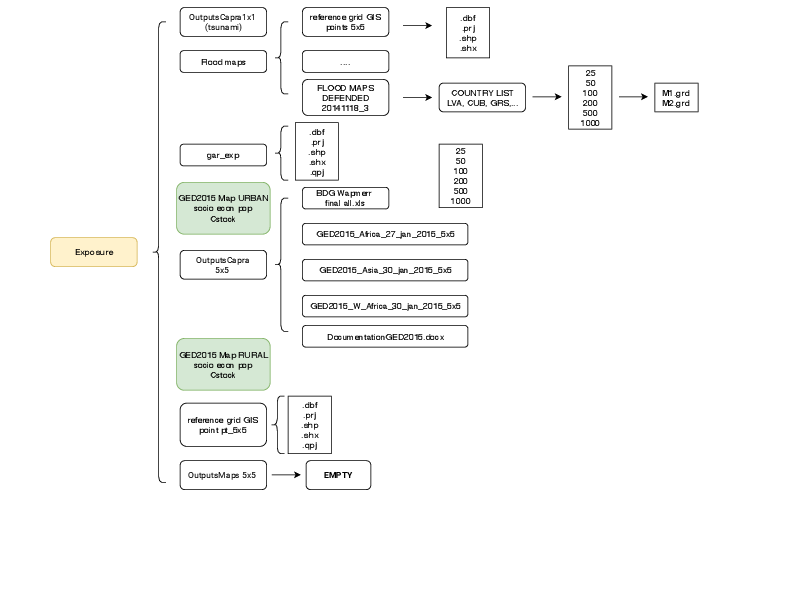

In [5]:
# TODO: make the scheme of the folder separately
from wand.image import Image as WImage
img = WImage(filename='/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/data/IDMC_Exposure.pdf')
img

In [ ]:
import geopandas 

In [2]:
# temporary on my local computer
FOLDER_GEN = "/Users/sychevaa/Desktop/Hack4Good/Data/exposure_part/"

## GED2015_Map_RURAL_socio_econ_pop_Cstock

In [3]:
FOLDER_RURAL = FOLDER_GEN + "GED2015_Map_RURAL_socio_econ_pop_Cstock/"
#os.listdir(FOLDER_RURAL)

**Q1:** Do these files have same attributes of are they all different?

**Q2:**  If no, do they correspond to the same number of observations? (i.e) can potentially be merged

In [21]:
#emp_ind = pd.read_csv(FOLDER_RURAL + 'ged2015rur_emp_ind.csv')
for f in os.listdir(FOLDER_RURAL):
    tmp_df = pd.read_csv(FOLDER_RURAL + f)
    print(f)
    print(tmp_df.columns.values)
    print(len(tmp_df))

ged2015rur_emp_agri.csv
['id_5x' 'iso3' 'emp_agri_pop' 'emp_agri_cst']
4570805
ged2015rur_emp_ind.csv
['id_5x' 'iso3' 'emp_ind_pop' 'emp_ind_cst']
4570805
ged2015rur_ic_high.csv
['id_5x' 'iso3' 'ic_high_pop' 'ic_high_cst']
4570805
ged2015rur_beds_priv.csv
['id_5x' 'iso3' 'beds_priv_pop' 'beds_priv_cst']
4570805
ged2015rur_edu_priv.csv
['id_5x' 'iso3' 'edu_priv_pop' 'edu_priv_cst']
4570805
ged2015rur_emp_serv.csv
['id_5x' 'iso3' 'emp_serv_pop' 'emp_serv_cst']
4570805
ged2015rur_tot.csv
['id_5x' 'iso3' 'tot_pop' 'tot_cst']
4570805
ged2015rur_ic_mhigh.csv
['id_5x' 'iso3' 'ic_mhigh_pop' 'ic_mhigh_cst']
4570805
ged2015rur_ic_mlow.csv
['id_5x' 'iso3' 'ic_mlow_pop' 'ic_mlow_cst']
4570805
ged2015rur_ic_low.csv
['id_5x' 'iso3' 'ic_low_pop' 'ic_low_cst']
4570805
ged2015rur_edu_pub.csv
['id_5x' 'iso3' 'edu_pub_pop' 'edu_pub_cst']
4570805
ged2015rur_beds_pub.csv
['id_5x' 'iso3' 'beds_pub_pop' 'beds_pub_cst']
4570805
ged2015rur_emp_gov.csv
['id_5x' 'iso3' 'emp_gov_pop' 'emp_gov_cst']
4570805


**Try to merge the files together:**

In [ ]:
emp_agri = pd.read_csv(FOLDER_RURAL + 'ged2015rur_emp_agri.csv')

rural_df = emp_agri

In [ ]:
RURAL_KEYS = ['id_5x','iso3']

In [25]:
for f in os.listdir(FOLDER_RURAL):
    if(f!='ged2015rur_emp_agri.csv'):
        print(f) # to control we do not add extra
        tmp_df = pd.read_csv(FOLDER_RURAL + f)
        rural_df = rural_df.merge(tmp_df, how='inner',
                                  on = RURAL_KEYS, 
                                  validate = 'one_to_one')
        assert len(rural_df) == len(tmp_df), "Problem with file {}".format(f)

print(rural_df.columns.values)

ged2015rur_emp_agri.csv
ged2015rur_emp_ind.csv
ged2015rur_ic_high.csv
ged2015rur_beds_priv.csv
ged2015rur_edu_priv.csv
ged2015rur_emp_serv.csv
ged2015rur_tot.csv
ged2015rur_ic_mhigh.csv
ged2015rur_ic_mlow.csv
ged2015rur_ic_low.csv
ged2015rur_edu_pub.csv
ged2015rur_beds_pub.csv
ged2015rur_emp_gov.csv
['id_5x' 'iso3' 'emp_agri_pop' 'emp_agri_cst' 'emp_ind_pop' 'emp_ind_cst'
 'ic_high_pop' 'ic_high_cst' 'beds_priv_pop' 'beds_priv_cst'
 'edu_priv_pop' 'edu_priv_cst' 'emp_serv_pop' 'emp_serv_cst' 'tot_pop'
 'tot_cst' 'ic_mhigh_pop' 'ic_mhigh_cst' 'ic_mlow_pop' 'ic_mlow_cst'
 'ic_low_pop' 'ic_low_cst' 'edu_pub_pop' 'edu_pub_cst' 'beds_pub_pop'
 'beds_pub_cst' 'emp_gov_pop' 'emp_gov_cst']


In [27]:
RURAL_ATT = set(rural_df.columns.values).difference(set(RURAL_KEYS))

In [29]:
rural_df.head(5)

id_5x iso3  emp_agri_pop  emp_agri_cst  emp_ind_pop  emp_ind_cst  \
0  115943  RUS           0.1           NaN          0.3     0.010012   
1  443555  RUS           0.1           NaN          0.3     0.011352   
2  452622  RUS           0.4           NaN          1.1     0.041911   
3  464592  RUS           0.3           NaN          1.0     0.037940   
4  478882  RUS           0.2           NaN          0.6     0.023230   

   ic_high_pop  ic_high_cst  beds_priv_pop  beds_priv_cst  ...  ic_mlow_pop  \
0          0.2     0.011681          0.007       0.000117  ...          0.7   
1          0.2     0.013244          0.007       0.000132  ...          0.7   
2          0.9     0.060010          0.028       0.000533  ...          2.6   
3          0.8     0.053116          0.024       0.000455  ...          2.3   
4          0.4     0.027101          0.014       0.000271  ...          1.3   

   ic_mlow_cst  ic_low_pop  ic_low_cst  edu_pub_pop  edu_pub_cst  \
0     0.007008         0.2    0.000334          0.2     0.002670   
1     0.007946         0.2    0.000378          0.2     0.003027   
2     0.029719         0.7    0.001334          0.9     0.013716   
3     0.026179         0.6    0.001138          0.8     0.012141   
4     0.015099         0.3    0.000581          0.4     0.006195   

   beds_pub_pop  beds_pub_cst  emp_gov_pop  emp_gov_cst  
0         0.012      0.000200          0.2     0.004806  
1         0.012      0.000227          0.2     0.005449  
2         0.050      0.000953          0.8     0.021946  
3         0.044      0.000835          0.7     0.019122  
4         0.025      0.000484          0.4     0.011150  

[5 rows x 28 columns]

In [30]:
rural_df[RURAL_ATT].describe()

ic_high_pop    ic_low_cst   ic_mlow_pop  beds_priv_cst   emp_ind_pop  \
count  4.570805e+06  4.570805e+06  4.570805e+06   4.570805e+06  4.570805e+06   
mean   9.453887e+01  2.966816e-01  2.449780e+02   1.107339e-02  8.007047e+01   
std    5.858621e+02  1.277124e+00  8.710873e+02   5.681267e-02  2.538356e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.254490e-03  1.300000e+00   9.937120e-05  1.200000e+00   
50%    0.000000e+00  1.375830e-02  1.210000e+01   5.592710e-04  6.000000e+00   
75%    6.000000e+00  9.465190e-02  8.580000e+01   3.489210e-03  3.460000e+01   
max    3.117470e+04  2.932550e+02  5.523330e+04   9.759090e+00  1.338520e+04   

        emp_ind_cst   emp_gov_pop   emp_gov_cst  ic_mhigh_cst   edu_pub_pop  \
count  4.570805e+06  4.570805e+06  4.570805e+06  4.570805e+06  4.570805e+06   
mean   2.976281e+00  1.260292e+01  4.651469e-01  1.277737e+00  1.314662e+02   
std    1.396806e+01  6.088791e+01  3.578154e+00  6.369179e+00  3.647451e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.176650e-02  0.000000e+00  0.000000e+00  0.000000e+00  2.400000e+00   
50%    1.158200e-01  0.000000e+00  0.000000e+00  3.587450e-02  1.270000e+01   
75%    7.772020e-01  2.900000e+00  5.013540e-02  3.647780e-01  7.470000e+01   
max    3.721810e+03  5.422900e+03  1.227580e+03  9.074210e+02  2.553040e+04   

       ...  edu_priv_cst  beds_priv_pop  emp_serv_cst   edu_pub_cst  \
count  ...  4.570805e+06   4.570805e+06  4.570805e+06  4.570805e+06   
mean   ...  1.859452e-01   8.823659e-01  3.588723e+00  1.375675e+00   
std    ...  1.012449e+00   2.698504e+00  1.674709e+01  5.736059e+00   
min    ...  0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  9.918460e-04   1.700000e-02  3.647950e-02  1.932710e-02   
50%    ...  7.948680e-03   8.400000e-02  1.788030e-01  9.729730e-02   
75%    ...  6.178250e-02   4.420000e-01  1.072640e+00  5.426290e-01   
max    ...  4.489260e+02   2.125550e+02  2.527810e+03  1.040380e+03   

       emp_agri_cst   ic_high_cst       tot_cst  edu_priv_pop   ic_mlow_cst  \
count           0.0  4.570805e+06  4.570805e+06  4.570805e+06  4.570805e+06   
mean            NaN  1.214608e+01  2.371935e+01  2.649249e+01  1.377615e+00   
std             NaN  1.026848e+02  1.414753e+02  1.250076e+02  6.020948e+00   
min             NaN  0.000000e+00  3.655810e-04  0.000000e+00  0.000000e+00   
25%             NaN  0.000000e+00  1.869180e-01  1.000000e-01  9.257630e-03   
50%             NaN  0.000000e+00  9.197510e-01  1.100000e+00  7.413400e-02   
75%             NaN  2.887250e-01  5.695490e+00  8.400000e+00  4.824450e-01   
max             NaN  1.798690e+04  2.353250e+04  9.552200e+03  1.646070e+03   

       ic_mhigh_pop  
count  4.570805e+06  
mean   7.879273e+01  
std    2.785416e+02  
min    0.000000e+00  
25%    0.000000e+00  
50%    2.900000e+00  
75%    3.000000e+01  
max    3.198280e+04  

[8 rows x 26 columns]

In [4]:
# so that I do not have to merge all the time
file_rural = FOLDER_GEN + "GED2015_Map_RURAL_socio_econ_pop_Cstock.csv"
#rural_df.to_csv(file_rural, index=False)
rural_df = pd.read_csv(file_rural)

FileNotFoundError: [Errno 2] File b'/Users/sychevaa/Desktop/Hack4Good/Data/exposure_part/GED2015_Map_RURAL_socio_econ_pop_Cstock.csv' does not exist: b'/Users/sychevaa/Desktop/Hack4Good/Data/exposure_part/GED2015_Map_RURAL_socio_econ_pop_Cstock.csv'

## GED2015_Map_URBAN_socio_econ_pop_Cstock

In [32]:
FOLDER_URBAN = FOLDER_GEN + "GED2015_Map_URBAN_socio_econ_pop_Cstock/"
os.listdir(FOLDER_URBAN)

['ged2015urb_emp_serv.csv',
 'ged2015urb_ic_high.csv',
 'ged2015urb_ic_mhigh.csv',
 'ged2015urb_emp_ind.csv',
 'ged2015urb_beds_pub.csv',
 'ged2015urb_tot.csv',
 'ged2015urb_beds_priv.csv',
 'ged2015urb_emp_gov.csv',
 'ged2015urb_emp_agri.csv',
 'ged2015urb_ic_low.csv',
 'ged2015urb_edu_priv.csv',
 'ged2015urb_edu_pub.csv',
 'ged2015urb_ic_mlow.csv']

In [33]:
first_urban = 'ged2015urb_emp_serv.csv'
emp_serv = pd.read_csv(FOLDER_URBAN + first_urban)
#emp_serv.head(5)

id_5x iso3  emp_serv_pop  emp_serv_cst
0  803560  NOR         420.1      36.11260
1  808868  NOR         385.7      33.15560
2  808869  NOR        2068.4     177.80200
3  808870  NOR         317.8      27.31870
4  836418  RUS         226.6       8.10453

In [35]:
# emp_serv.columns.values
URBAN_KEYS = ['id_5x', 'iso3']

In [36]:
urban_df = emp_serv

for f in os.listdir(FOLDER_URBAN):
    if(f!=first_urban):
        print(f) # to control we do not add extra
        tmp_df = pd.read_csv(FOLDER_URBAN + f)
        urban_df = urban_df.merge(tmp_df, how='inner',
                                  on=URBAN_KEYS, 
                                  validate = 'one_to_one')
        assert len(urban_df) == len(tmp_df), "Problem with file {}".format(f)

print(urban_df.columns.values)

ged2015urb_ic_high.csv
ged2015urb_ic_mhigh.csv
ged2015urb_emp_ind.csv
ged2015urb_beds_pub.csv
ged2015urb_tot.csv
ged2015urb_beds_priv.csv
ged2015urb_emp_gov.csv
ged2015urb_emp_agri.csv
ged2015urb_ic_low.csv
ged2015urb_edu_priv.csv
ged2015urb_edu_pub.csv
ged2015urb_ic_mlow.csv
['id_5x' 'iso3' 'emp_serv_pop' 'emp_serv_cst' 'ic_high_pop' 'ic_high_cst'
 'ic_mhigh_pop' 'ic_mhigh_cst' 'emp_ind_pop' 'emp_ind_cst' 'beds_pub_pop'
 'beds_pub_cst' 'tot_pop' 'tot_cst' 'beds_priv_pop' 'beds_priv_cst'
 'emp_gov_pop' 'emp_gov_cst' 'emp_agri_pop' 'emp_agri_cst' 'ic_low_pop'
 'ic_low_cst' 'edu_priv_pop' 'edu_priv_cst' 'edu_pub_pop' 'edu_pub_cst'
 'ic_mlow_pop' 'ic_mlow_cst']


In [37]:
#len(urba n_df)

152543

In [38]:
file_urban = FOLDER_GEN + "GED2015_Map_URBAN_socio_econ_pop_Cstock.csv"
urban_df.to_csv(file_urban, index=False)

In [39]:
URBAN_ATT = set(urban_df.columns.values).difference(set(URBAN_KEYS))

**Q2:** Do urban and rural data have the same attributes ?  - **Yes**

In [40]:
set(URBAN_ATT).difference(set(RURAL_ATT))

set()

**Q3:** Do urban and rural datasets have same **id_5x** keys?

In [52]:
len(set(urban_df['id_5x']).intersection(set(rural_df['id_5x'])))

149881

**WHAT DO 26 DIFFERENT ATTRIBUTES MEAN?**

Potential description of some variables can be found in [this document](https://docs.google.com/document/d/11WS2kCEz3rTY5qXYucRvEjg9F46_e1sI/edit). This document does not provide clarification on:

1. What is the difference between **_cst** and **_pop**
2. What does **tot** mean




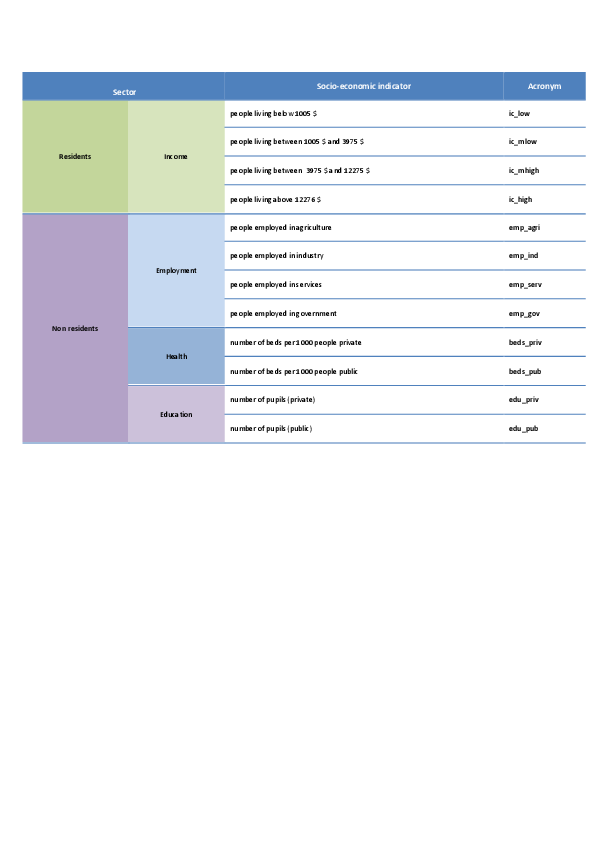

In [53]:
from wand.image import Image as WImage
img = WImage(filename = os.getcwd()+'/rural_urban_var_decr.pdf')
img
# OK NEED to improve that

In [48]:
#sorted(URBAN_ATT)
#len(URBAN_ATT)

**Q3:** What is the difference between attribute with suffixes _cst and _pop? Do they have different values? - **Yes**

In [47]:
urban_df[['tot_cst','tot_pop']].head(5)  

tot_cst   tot_pop
0   490.9030   3128.52
1   450.7170   2872.45
2  2417.0500  15404.20
3   371.3600   2366.74
4    51.2497   1806.85

## Explore Shape Files

**Comments**

1. **<font color="red">Can't open the shape file unless all mandatory files (with extensions .shp, .shx, .dbf) are in the same folder!!!</font>**
2. [Fiona user reference](https://fiona.readthedocs.io/en/latest/manual.html)
3. **WHAT is the difference between different suffixes: _pu  _cu  _pr  _cr in the variable names?**

In [16]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
#c = fiona.open(

In [17]:
SHAPE_FILE_FOLDER = "/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/data/exposure_part/"

SHAPE_FILE_FOLDER1 = SHAPE_FILE_FOLDER + "gar_exp/"
SHAPE_FILE_FOLDER2 = SHAPE_FILE_FOLDER + "sample_shape_file/"

gar_exp = fiona.open(SHAPE_FILE_FOLDER1, 'r') #gpd.read_file(SHAPE_FILE_FOLDER1 + 'gar_exp.shp')
# LOADING THIS FILE TAKES QUITE SOME TIME ... ACTUALLY DID NOT LOAD

#gar2015 = gpd.read_file(SHAPE_FILE_FOLDER + 'gar2015.shp')

**Q:** How many records are there? - 4573467

In [20]:
len(gar_exp)

4573467

OGR format driver used to open the vector file.

In [24]:
gar_exp.driver

'ESRI Shapefile'

The coordinate reference system (CRS) of the collection’s vector data

In [19]:
gar_exp.crs

{'init': 'epsg:4326'}

The minimum bounding rectangle (MBR)  of the shape file:

In [21]:
gar_exp.bounds

(-179.97916666633313,
 -55.69583335731147,
 179.93750000321293,
 81.80416664378855)

**Access the schema:**

In [23]:
import pprint
pprint.pprint(gar_exp.schema)

{'geometry': 'Point',
 'properties': OrderedDict([('id_5x', 'int:10'),
                            ('iso3', 'str:6'),
                            ('bed_prv_pu', 'float:13.4'),
                            ('bed_pub_pu', 'float:13.4'),
                            ('edu_prv_pu', 'float:13.4'),
                            ('edu_pub_pu', 'float:13.4'),
                            ('emp_agr_pu', 'float:13.4'),
                            ('emp_gov_pu', 'float:13.4'),
                            ('emp_ind_pu', 'float:13.4'),
                            ('emp_ser_pu', 'float:13.4'),
                            ('ic_high_pu', 'float:13.4'),
                            ('ic_low_pu', 'float:13.4'),
                            ('ic_mhg_pu', 'float:13.4'),
                            ('ic_mlw_pu', 'float:13.4'),
                            ('tot_pu', 'float:13.4'),
                            ('bed_prv_cu', 'float:13.4'),
                            ('bed_pub_cu', 'float:13.4'),
                   

**How does a single record look like?**

In [32]:
gar_exp[1]['properties']
_pu  _cu  _pr  _cr

OrderedDict([('id_5x', 50938),
             ('iso3', 'RUS'),
             ('bed_prv_pu', 0.0),
             ('bed_pub_pu', 0.0),
             ('edu_prv_pu', 0.0),
             ('edu_pub_pu', 0.0),
             ('emp_agr_pu', 0.0),
             ('emp_gov_pu', 0.0),
             ('emp_ind_pu', 0.0),
             ('emp_ser_pu', 0.0),
             ('ic_high_pu', 0.0),
             ('ic_low_pu', 0.0),
             ('ic_mhg_pu', 0.0),
             ('ic_mlw_pu', 0.0),
             ('tot_pu', 0.0),
             ('bed_prv_cu', 0.0),
             ('bed_pub_cu', 0.0),
             ('edu_prv_cu', 0.0),
             ('edu_pub_cu', 0.0),
             ('emp_agr_cu', 0.0),
             ('emp_gov_cu', 0.0),
             ('emp_ind_cu', 0.0),
             ('emp_ser_cu', 0.0),
             ('ic_high_cu', 0.0),
             ('ic_low_cu', 0.0),
             ('ic_mhg_cu', 0.0),
             ('ic_mlw_cu', 0.0),
             ('tot_cu', 0.0),
             ('bed_prv_pr', 0.007),
             ('bed_pub_pr', 0.012

In [27]:
pprint.pprint(gar_exp[1]['properties'])

OrderedDict([('id_5x', 50938),
             ('iso3', 'RUS'),
             ('bed_prv_pu', 0.0),
             ('bed_pub_pu', 0.0),
             ('edu_prv_pu', 0.0),
             ('edu_pub_pu', 0.0),
             ('emp_agr_pu', 0.0),
             ('emp_gov_pu', 0.0),
             ('emp_ind_pu', 0.0),
             ('emp_ser_pu', 0.0),
             ('ic_high_pu', 0.0),
             ('ic_low_pu', 0.0),
             ('ic_mhg_pu', 0.0),
             ('ic_mlw_pu', 0.0),
             ('tot_pu', 0.0),
             ('bed_prv_cu', 0.0),
             ('bed_pub_cu', 0.0),
             ('edu_prv_cu', 0.0),
             ('edu_pub_cu', 0.0),
             ('emp_agr_cu', 0.0),
             ('emp_gov_cu', 0.0),
             ('emp_ind_cu', 0.0),
             ('emp_ser_cu', 0.0),
             ('ic_high_cu', 0.0),
             ('ic_low_cu', 0.0),
             ('ic_mhg_cu', 0.0),
             ('ic_mlw_cu', 0.0),
             ('tot_cu', 0.0),
             ('bed_prv_pr', 0.007),
             ('bed_pub_pr', 0.012

In [ ]:
# CRS code
gar2015.crs

In [ ]:
# Attributes ?
gar2015.columns.values # (267, 194)

In [35]:
gar2015 = gpd.read_file(SHAPE_FILE_FOLDER1 + 'gar_exp.shp')

KeyboardInterrupt: 

**Basic plots**

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
attr = 'EQ_AAL'
gar2015.loc[ gar2015[attr].isnull() == False, ].plot(column=attr,
             # categorical=True,
             legend=True,
             #figsize=(10,6),
             #markersize=45,
             cmap='OrRd', #"Set2",
             scheme='quantiles',
             ax=ax)


## FLOOD 

Open one of the files from the folder Flood (projection WGS 1984)

<br>

**Comments:** 
1. Each folder contains an .AME file with some XML style input. Appaerntly files contain some simulations produced by **CIMA Flooding Team**
2. Foldernames 25, 50, ... 1000 correspond apparently to the return period.
3. [Rasterio source](https://rasterio.readthedocs.io/en/stable/topics/features.html)

In [37]:
import rasterio

In [11]:
SAMPLE_FOLDER = "/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/data/exposure_part/France/50/"
SAMPLE_FILE1 = SAMPLE_FOLDER + "SC0_M1.grd"
SAMPLE_FILE2 = SAMPLE_FOLDER + "SC0_M2.grd"

In [60]:
#sco_m1 = fiona.open(SAMPLE_FILE1, 'r') 
sco_m1 = rasterio.open(SAMPLE_FILE1, 'r')
sco_m2 = rasterio.open(SAMPLE_FILE2, 'r')

Number of raster bands

In [40]:
sco_m1.count

1

In [61]:
val11 = sco_m1.width
val12 = sco_m1.height

val21 = sco_m2.width
val22 = sco_m2.height

msg = "File 1: Columns: {} Rows: {}\nFile 2: Columns: {} Rows: {}\n".format(val11, val12, val21, val22)
print(msg)
#print(sco_m1.crs)

File 1: Columns: 1531 Rows: 1101
File 2: Columns: 1531 Rows: 1101



In [59]:
sco_m1.transform

Affine(0.008999999999999985, 0.0, -5.227833333334008,
       0.0, -0.009000000000000005, 51.14783333333303)

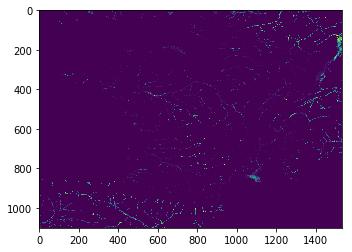

In [64]:
from matplotlib import pyplot

pyplot.imshow(sco_m1.read(1))# , cmap='pink'
pyplot.show()

In [71]:
from rasterio.plot import show
from rasterio.plot import show_hist
#show(sco_m1, cmap='viridis')

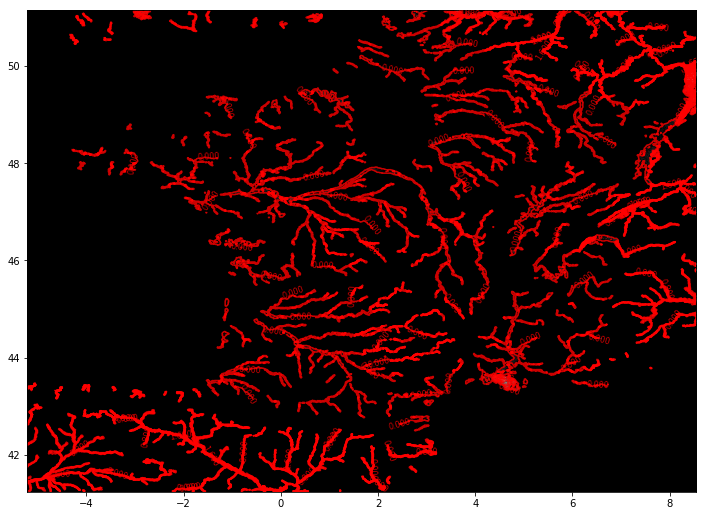

In [68]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show((sco_m1, 1), cmap='Greys_r', interpolation='none', ax=ax)
show((sco_m1, 1), contour=True, ax=ax)
pyplot.show()

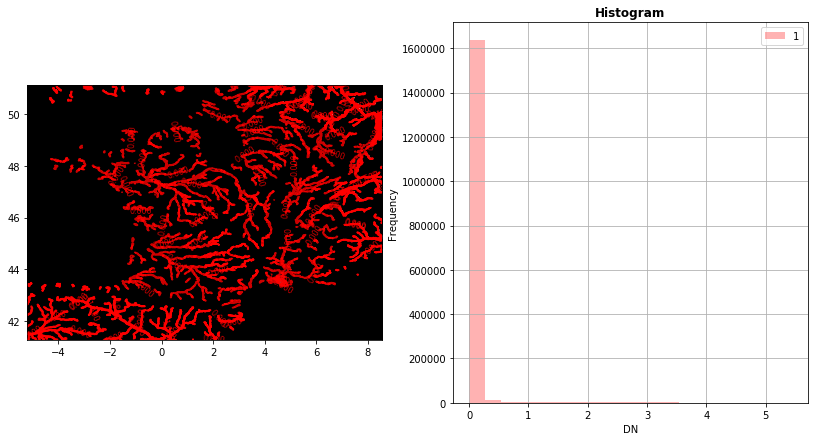

In [87]:
fig, (axrgb1, axhist1) = pyplot.subplots(nrows=1, ncols=2, figsize=(14,7))

# Data set 1
show((sco_m1, 1), cmap='Greys_r', interpolation='none', ax=axrgb1)
show((sco_m1, 1), contour=True, ax=axrgb1)


show_hist(sco_m1, bins=20, 
          histtype='stepfilled',
          lw=0.0, stacked=False, 
          alpha=0.3, ax=axhist1)


pyplot.show()

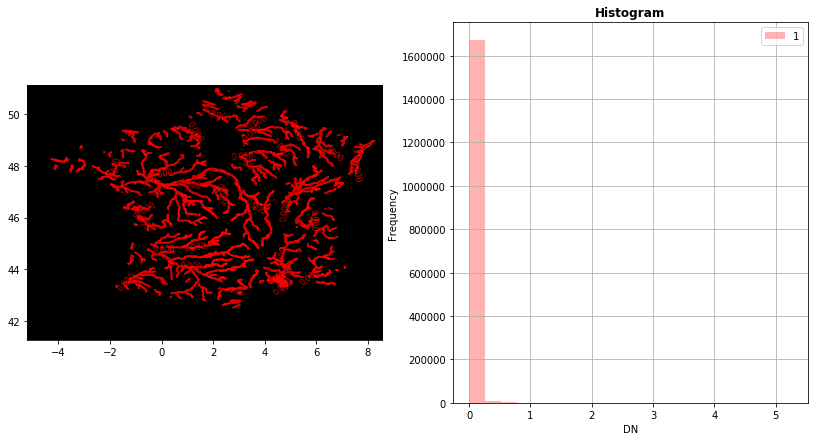

In [86]:
fig, (axrgb2, axhist2) = pyplot.subplots(nrows=1, ncols=2, figsize=(14,7))


# Data set 2
show((sco_m2, 1), cmap='Greys_r', interpolation='none', ax=axrgb2)
show((sco_m2, 1), contour=True, ax=axrgb2)


show_hist(sco_m2, bins=20, 
          histtype='stepfilled',
          lw=0.0, stacked=False, 
          alpha=0.3, ax=axhist2)

pyplot.show()

In [89]:
np.mean(sco_m2.read(1))

0.010259837

In [ ]:
## 